<a href="https://colab.research.google.com/github/titusx00/UBER-stock-price-prediction/blob/main/kopie_von_stockpriceprediction_uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: In this project, a Long Short Term Memory (LSTM) model is used to predict the closing price of Uber Technologies, Inc.
#             based on the past 60 days of stock prices.

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Integrating the file into Google Drive for future collab sessions
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Load data
df = pd.read_csv('/content/drive/MyDrive/UBER_adj_close_data.csv', skiprows=2, index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
#Show the data
df

,Unnamed: 1
Date,
2019-05-10,41.570000
2019-05-13,37.099998
2019-05-14,39.959999
2019-05-15,41.290001
2019-05-16,43.000000
...,...
2025-11-11,93.599998
2025-11-12,93.570000
2025-11-13,91.779999


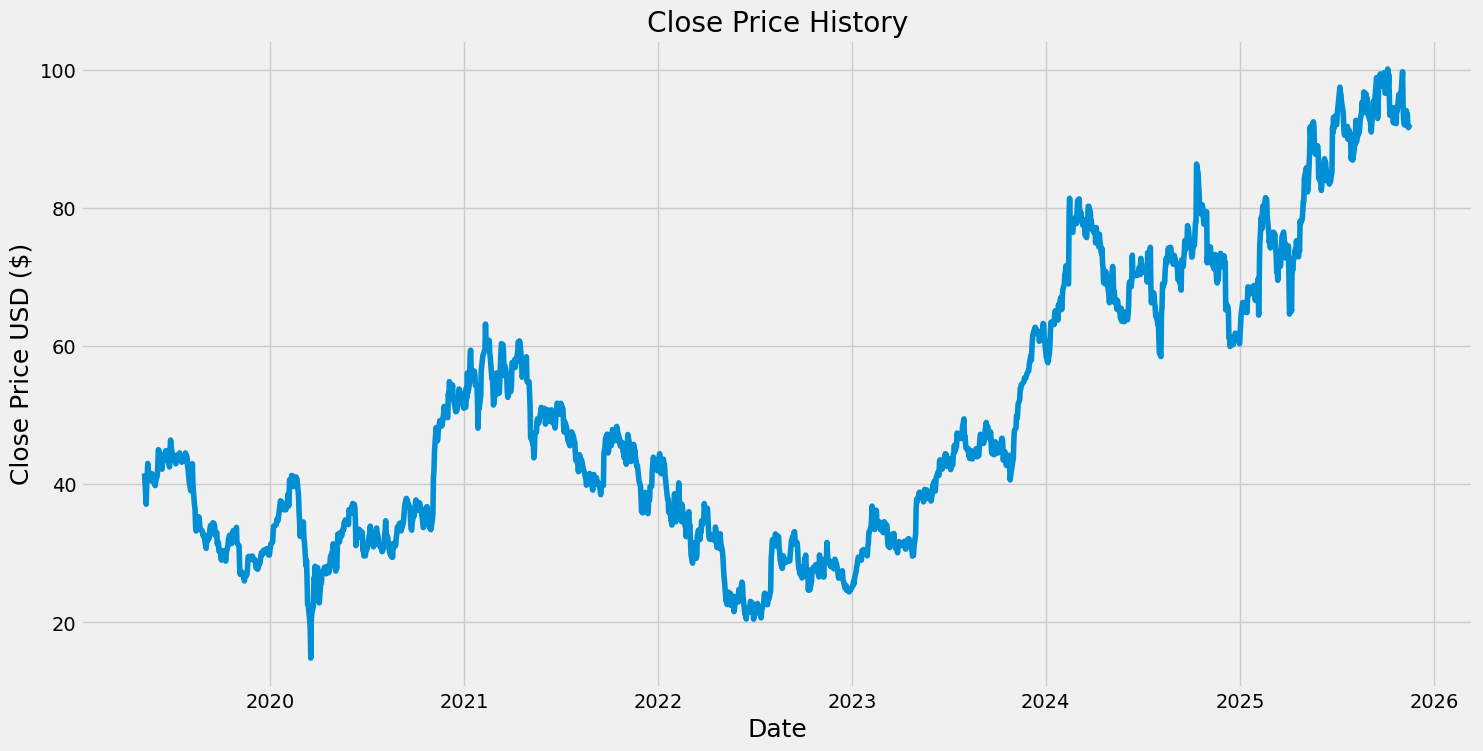

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Unnamed: 1']) #Unnamed: 1 == closing price
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only 'Close' column
data = df.filter(['Unnamed: 1'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1313

In [ ]:
#Scale the data for LSTM model
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)
scaled_data

array([[0.31367261],
       [0.26125703],
       [0.29479362],
       ...,
       [0.90243903],
       [0.9005629 ],
       [0.90630865]])

In [ ]:
#Create (scaled) training data set
training_data = scaled_data[0:training_data_len , :]
#Split the data between x_train und y_train
x_train = []
y_train = []
for i in range(60, len(training_data)):
  x_train.append(training_data[i-60:i, 0])
  y_train.append(training_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.31367261, 0.26125703, 0.29479362, 0.31038932, 0.33044091,
       0.31765948, 0.31390714, 0.31285179, 0.30992027, 0.30077394,
       0.31296903, 0.30640246, 0.29455909, 0.29291745, 0.30007036,
       0.30992027, 0.32750939, 0.35389307, 0.35295496, 0.34404316,
       0.32586775, 0.32399157, 0.32070824, 0.34580209, 0.3331379 ,
       0.33958724, 0.34052534, 0.35225142, 0.34052534, 0.34216699,
       0.33149626, 0.33149626, 0.32457787, 0.35541747, 0.37007507,
       0.34533303, 0.34216699, 0.34486398, 0.33665572, 0.32985461,
       0.34451221, 0.33864917, 0.34204975, 0.34204975, 0.3483818 ,
       0.34369139, 0.33771107, 0.33876641, 0.33255161, 0.33853189,
       0.3346623 , 0.33935271, 0.33513136, 0.34826455, 0.34075987,
       0.32563322, 0.32035647, 0.31062385, 0.29995312, 0.28412289])]
[np.float64(0.28529552274057013)]

[array([0.31367261, 0.26125703, 0.29479362, 0.31038932, 0.33044091,
       0.31765948, 0.31390714, 0.31285179, 0.30992027, 0.30077394,
       0.31296903, 0.30

In [ ]:
#Reshape the data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1253, 60, 1)

In [ ]:
from keras.layers import Input # Import Input layer

#Build the LSTM model
model = Sequential()
# Explicitly define the Input layer as the first layer
model.add(Input(shape=(x_train.shape[1], 1))) # (timesteps, features)
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)
#Create the testing data
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

1253/1253 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - loss: 0.0059


In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Re-initialize and re-fit the scaler on the original single-feature dataset
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)

#Predicted price values
predictions = model.predict(x_test)
predictions = scale.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [ ]:
#root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

np.float64(0.30607527058298994)

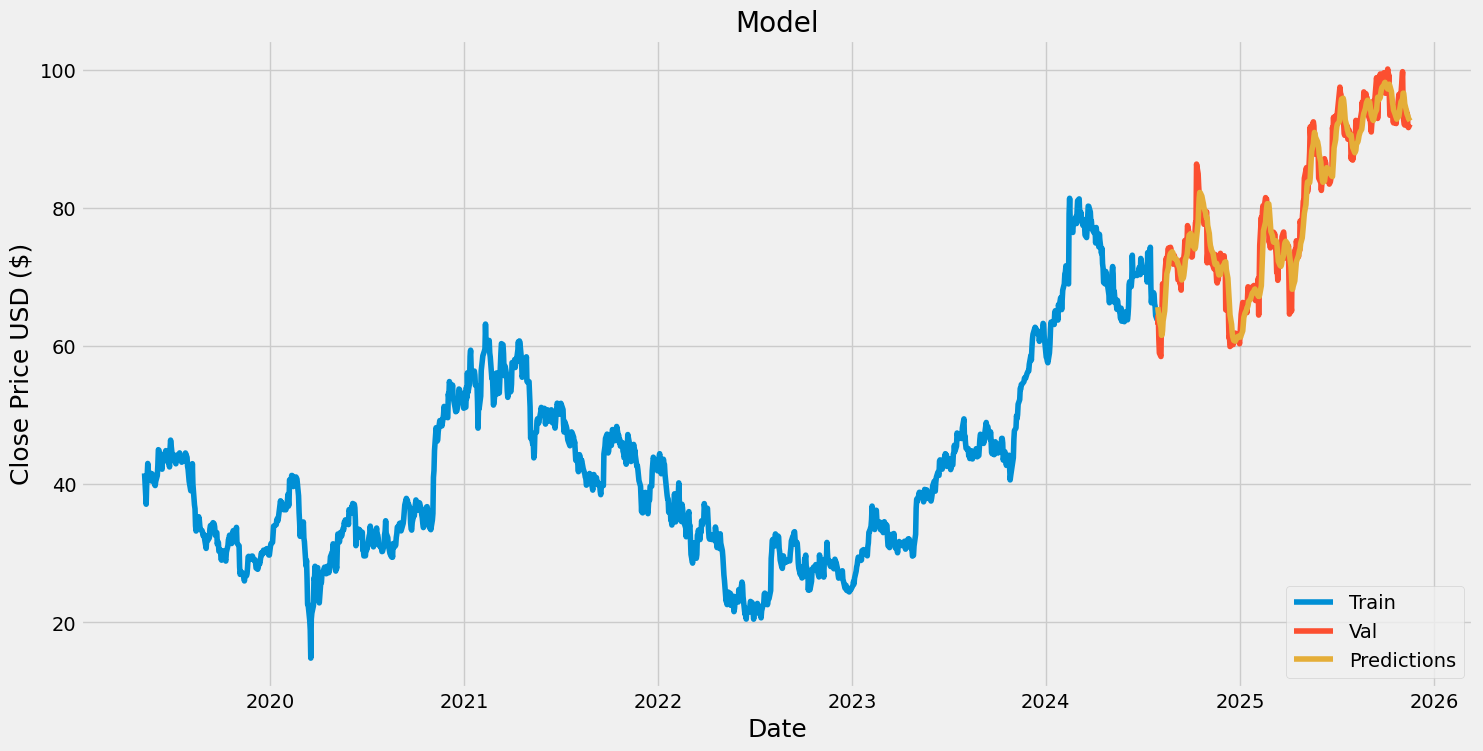

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy() # Explicitly create a copy to avoid SettingWithCopyWarning
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Unnamed: 1'])
plt.plot(valid[['Unnamed: 1', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Unnamed: 1,Predictions
Date,,
2024-07-30,63.090000,65.633453
2024-07-31,64.470001,64.892815
2024-08-01,61.020000,64.497673
2024-08-02,58.990002,63.764687
2024-08-05,58.480000,62.688030
...,...,...
2025-11-11,93.599998,93.691574
2025-11-12,93.570000,93.442314
2025-11-13,91.779999,93.322464


In [ ]:
#Get the quote and load CSV
df = pd.read_csv('/content/drive/MyDrive/UBER_adj_close_data.csv', skiprows=2, index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

#Set time period based on CSV data
start_date = df.index.min()  # first date
end_date = df.index.max()    # last date

# Fetch quotes from Yahoo using yfinance for dynamic start and end dates
uber_quote = yf.download('UBER', start=start_date, end=end_date)

#Create a new dataframe using the 'Adj Close' column from yfinance output
new_df = uber_quote[('Close', 'UBER')].to_frame(name='Adj Close')

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days = scale.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test, verbose=0)
#undo the scaling
pred_price = scale.inverse_transform(pred_price)
#Print the predicted price
print(pred_price)

/tmp/ipython-input-1748243654.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  uber_quote = yf.download('UBER', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

[[92.59153]]
